In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import xgcm
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)

# path to ocean_month file
path_month_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_month.nc'
dm_straight = xr.open_dataset(path_month_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)

# path to ocean_month file
path_month_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_month.nc'
dm_both = xr.open_dataset(path_month_both, decode_times=True)



# Case name (Wide Coast)
case_wide = 'Wide Coast'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)

# path to ocean_month file
path_month_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_month.nc'
dm_wide = xr.open_dataset(path_month_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)

# path to ocean_month file
path_month_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_month.nc'
dm_am = xr.open_dataset(path_month_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)

# path to ocean_month file
path_month_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_month.nc'
dm_af = xr.open_dataset(path_month_af, decode_times=True)


#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_straight['xh']==211)[0][0]
x_east = np.where(dy_straight['xh']==351)[0][0]
y = np.where(dy_straight['yq']==-35)[0][0]
y_south = np.where(dy_straight['yq']==-71)[0][0]
y_north = np.where(dy_straight['yq']==71)[0][0]

#=================================================
# Make grid object for XGCM 
# #=================================================
# grid_straight = xgcm.Grid(dm_straight, coords={'x': {'center':'xq', 'left':'xh'}, 'y': {'center':'yq', 'left':'yh'}})


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [18]:
# umo_slice = dz_straight.umo.isel(time=slice(70,100)).mean(dim='time')/1030
# umo_sum = -umo_slice.sum(dim='z_l')

# umosum = umoslice = xr.concat([umo_sum.sel(xq=slice(209,360)), 
#                            umo_sum.sel(xq=slice(0,209))], dim='xq')

# cumsum = np.zeros_like(umosum)
# for row in range(umosum.shape[0]):
#     running_total = 0
#     for column in reversed(range(umosum.shape[1])):
#         if (umosum[row,column] == 0.0):
#             running_total = 0
#         else:
#             running_total += umosum[row,column]
#         cumsum[row, column] = running_total

# umoslice = xr.concat([umo_slice.isel(z_l=0).sel(xq=slice(209,360)), 
#                            umo_slice.isel(z_l=0).sel(xq=slice(0,209))], dim='xq')
# mask = np.isnan(umoslice)

# psi = np.where(mask==False, cumsum/1e6, np.nan)

# plt.subplots(figsize=(14,8))
# plt.contourf(umo_sum.xq, umo_sum.yh, psi, cmap='RdBu_r', levels=np.linspace(-1000,1000,21,endpoint=True), extend='both')
# # plt.contour(psi, colors='k', levels=np.linspace(-1000,1000,7,endpoint=True))
# # plt.plot([209,209], [-80,80], '--')
# plt.title('{} Barotropic Streamfunction'.format(case_straight), fontsize=16)
# plt.colorbar()

In [33]:
def barotropic_sfn(dataset):
    '''This function calculates the barotropic streamfunction. 
    The dataset input must be the ocean_annual_z.nc model output file.'''
#     vmo_slice = dataset.vmo.isel(time=slice(70,100)).mean(dim='time')/1030
    vmo_slice = dataset.vmo.mean(dim='time')/1030
    
    vmo_sum = -vmo_slice.sum(dim='z_l')

    vmosum = xr.concat([vmo_sum.sel(xh=slice(209,360)), 
                               vmo_sum.sel(xh=slice(0,208))], dim='xh')

    cumsum = np.zeros_like(vmosum)
    for row in range(vmosum.shape[0]):
        running_total = 0
        for column in reversed(range(vmosum.shape[1])):
            if (vmosum[row,column] == 0.0):
                running_total = 0
            else:
                running_total += vmosum[row,column]
            cumsum[row, column] = running_total

    vmoslice = xr.concat([vmo_slice.isel(z_l=0).sel(xh=slice(209,360)), 
                               vmo_slice.isel(z_l=0).sel(xh=slice(0,208))], dim='xh')
    
    mask = np.isnan(vmoslice)

    psi = np.where(mask==False, cumsum/1e6, np.nan)
    
    return(psi)


def plot_barotropic_sfn(dataset, case, barotropic_streamfunction):
    plt.subplots(figsize=(14,8))
    cf = plt.contourf(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
             cmap='RdBu_r', levels=np.linspace(-50,50,41,endpoint=True), extend='both')
    c = plt.contour(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
                    colors='gray', levels=np.linspace(-50,50,15,endpoint=True))
    plt.title('{} Barotropic Streamfunction'.format(case), fontsize=16)
    cbar = plt.colorbar(cf)
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    plt.show()
    
    mask = np.zeros(barotropic_streamfunction.shape, dtype=bool)
    mask = np.where(~np.isnan(barotropic_streamfunction), mask, 1)

    plt.subplots(figsize=(9,8))
    cf = plt.contourf(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
             cmap='RdBu_r', levels=np.linspace(-20,20,41,endpoint=True), extend='both')
    c = plt.contour(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
                    colors='gray', levels=np.linspace(-25,25,13,endpoint=True))
    plt.title('{} Barotropic Streamfunction'.format(case), fontsize=16)
    plt.contour(dataset.vmo.xh, dataset.vmo.yq, mask, [0.01], colors='gray')
    cbar = plt.colorbar(cf)
    cbar.ax.set_ylabel('[Sv]', fontsize=12)
    plt.xlim([0,150]), plt.ylim([-40, 75])
#     plt.plot([0,150], [0,0], color='gray', linestyle='dashed')
    plt.show()
    return


# def plot_barotropic_sfn(dataset, case, barotropic_streamfunction):
#     fig = plt.figure(figsize=(14, 6))
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0.0))
#     cf = ax.contourf(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
#              cmap='RdBu_r', levels=np.linspace(-50,50,41,endpoint=True), extend='both', transform=ccrs.PlateCarree())
#     c = ax.contour(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
#                     colors='gray', levels=np.linspace(-50,50,13,endpoint=True), transform=ccrs.PlateCarree())
#     plt.title('{} Barotropic Streamfunction'.format(case), fontsize=16)
#     cbar = plt.colorbar(cf)
#     cbar.ax.set_ylabel('[Sv]', fontsize=12)
#     plt.show()
#     return    

In [34]:
psi_straight = barotropic_sfn(dz_straight)

# dz_straight

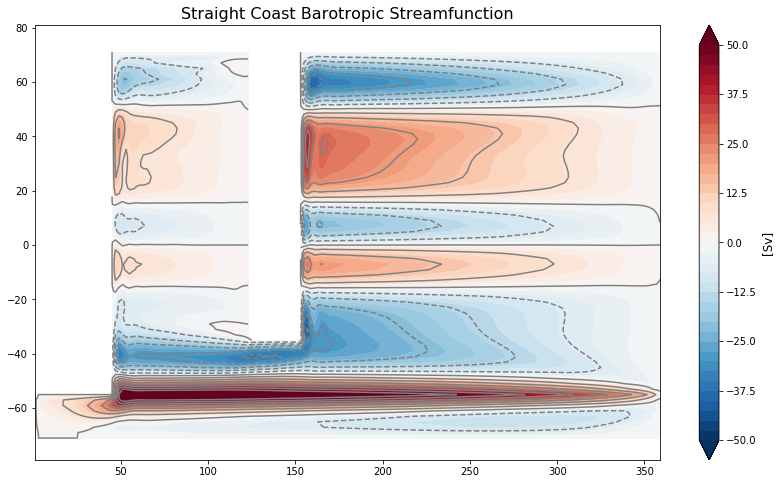

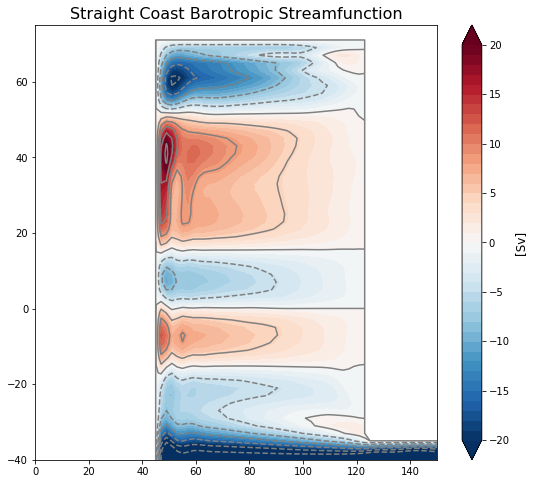

In [35]:
plot_barotropic_sfn(dz_straight, case_straight, psi_straight)

In [36]:
psi_both = barotropic_sfn(dz_both)

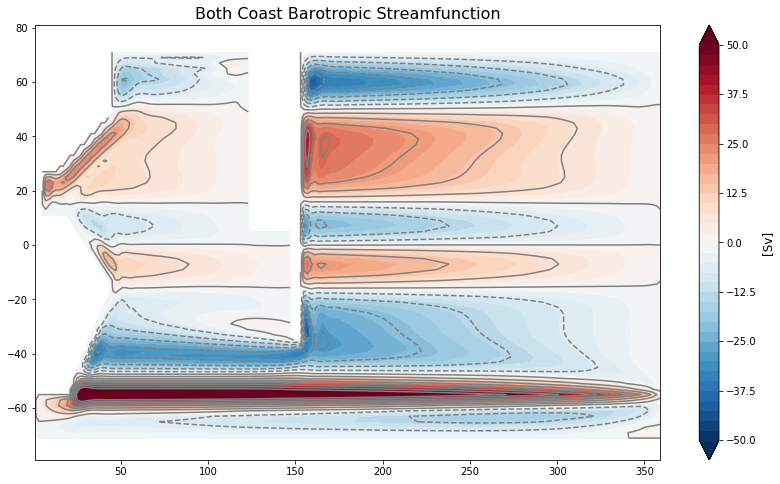

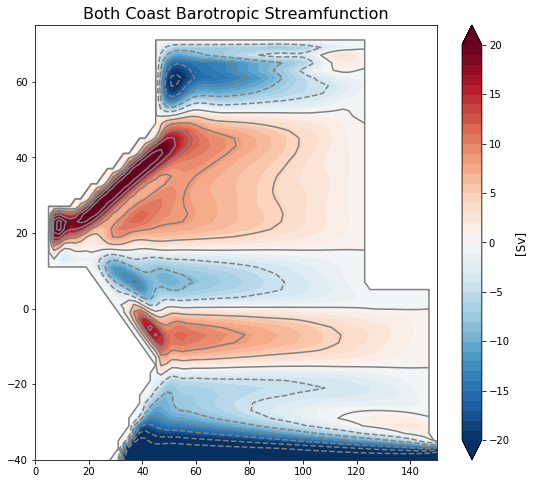

In [37]:
plot_barotropic_sfn(dz_both, case_both, psi_both)

In [38]:
psi_wide = barotropic_sfn(dz_wide)

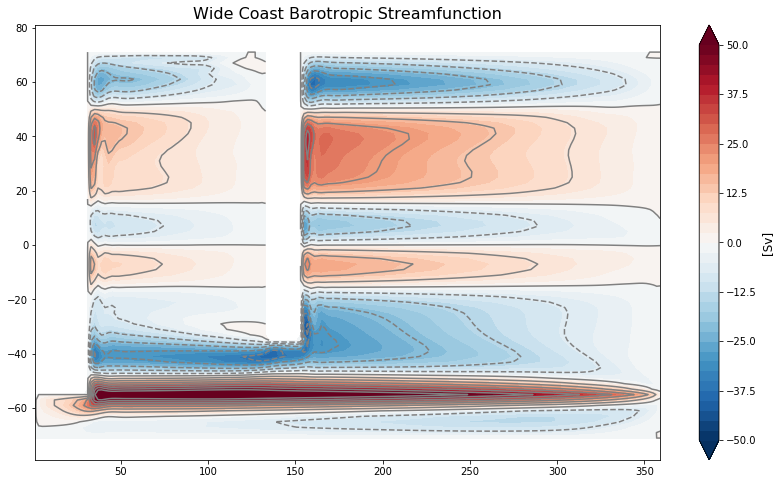

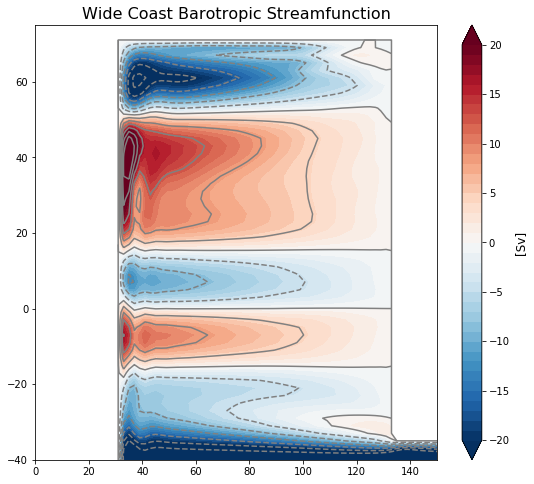

In [39]:
plot_barotropic_sfn(dz_wide, case_wide, psi_wide)

In [40]:
psi_am = barotropic_sfn(dz_am)

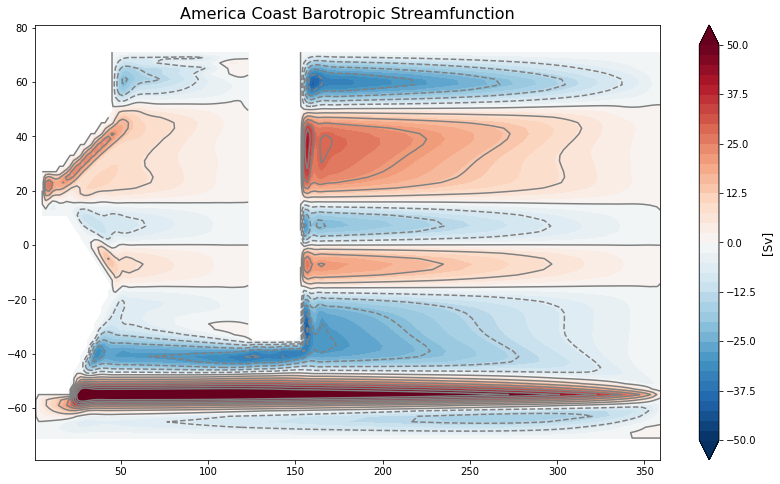

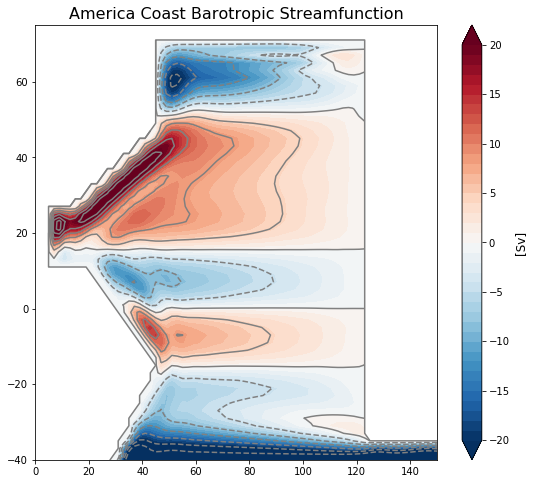

In [41]:
plot_barotropic_sfn(dz_am, case_am, psi_am)

In [42]:
psi_af = barotropic_sfn(dz_af)

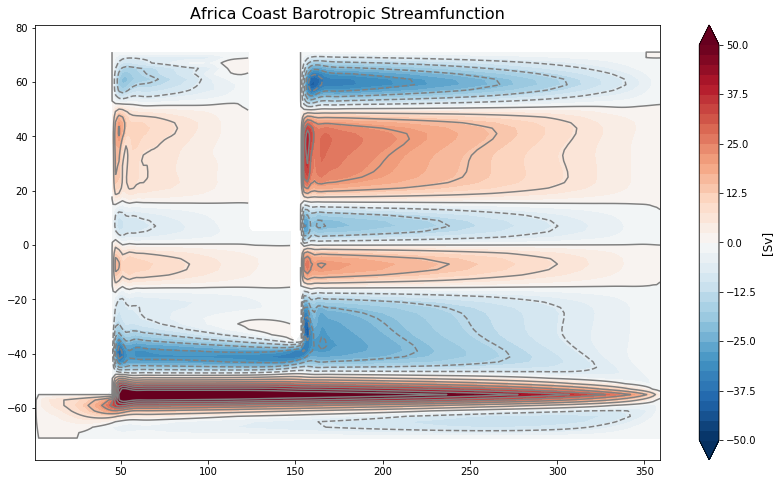

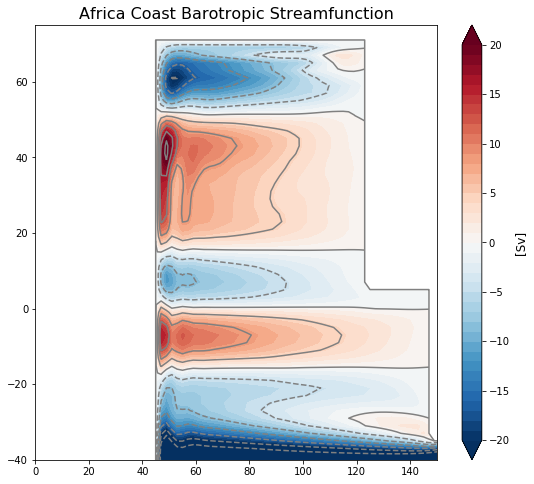

In [43]:
plot_barotropic_sfn(dz_af, case_af, psi_af)

((0, 150), (-40, 75))

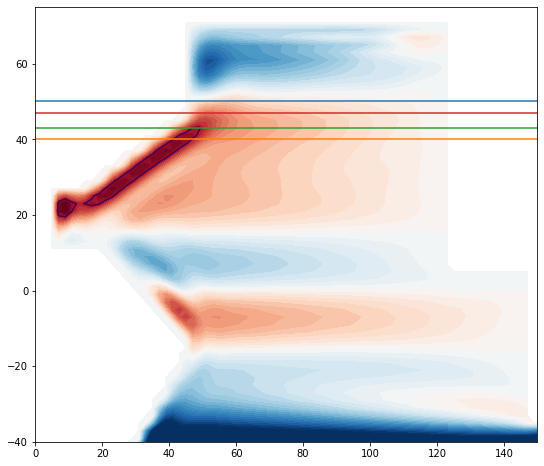

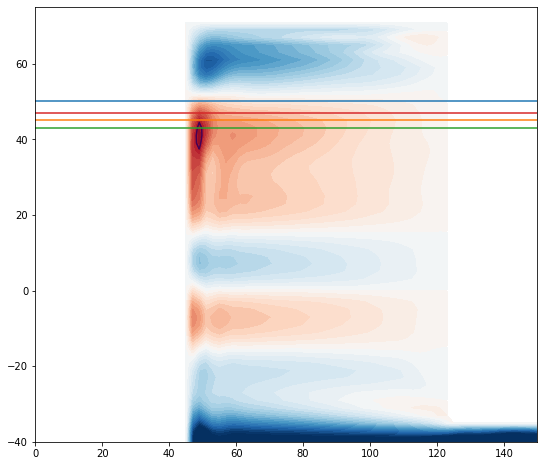

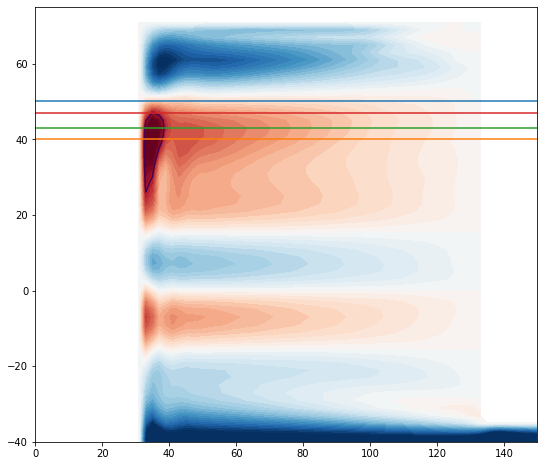

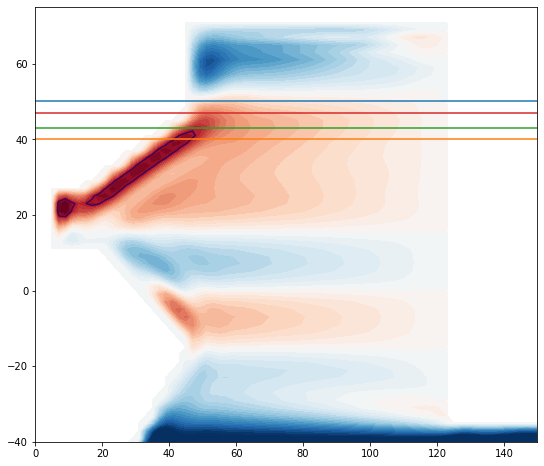

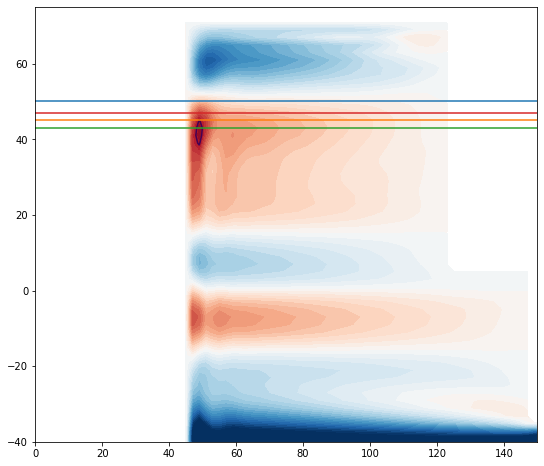

In [44]:
plt.subplots(figsize=(9,8))
cf = plt.contourf(dz_both.vmo.xh, dz_both.vmo.yq, psi_both, 
                  cmap='RdBu_r', levels=np.linspace(-25,25,41,endpoint=True), extend='both')
c = plt.contour(dz_both.vmo.xh, dz_both.vmo.yq, psi_both, levels=[20])
plt.plot([0,360], [50,50])
# plt.plot([0,360], [69,69])
plt.plot([0,360], [40,40])
plt.plot([0,360], [43,43])
plt.plot([0,360], [47,47])
plt.xlim([0,150]), plt.ylim([-40, 75])

plt.subplots(figsize=(9,8))
cf = plt.contourf(dz_straight.vmo.xh, dz_straight.vmo.yq, psi_straight, 
                  cmap='RdBu_r', levels=np.linspace(-25,25,41,endpoint=True), extend='both')
c = plt.contour(dz_straight.vmo.xh, dz_straight.vmo.yq, psi_straight, levels=[20])
plt.plot([0,360], [50,50])
# plt.plot([0,360], [69,69])
plt.plot([0,360], [45,45])
plt.plot([0,360], [43,43])
plt.plot([0,360], [47,47])
plt.xlim([0,150]), plt.ylim([-40, 75])

plt.subplots(figsize=(9,8))
cf = plt.contourf(dz_wide.vmo.xh, dz_wide.vmo.yq, psi_wide, 
                  cmap='RdBu_r', levels=np.linspace(-25,25,41,endpoint=True), extend='both')
c = plt.contour(dz_wide.vmo.xh, dz_wide.vmo.yq, psi_wide, levels=[20])
plt.plot([0,360], [50,50])
# plt.plot([0,360], [69,69])
plt.plot([0,360], [40,40])
plt.plot([0,360], [43,43])
plt.plot([0,360], [47,47])
plt.xlim([0,150]), plt.ylim([-40, 75])

plt.subplots(figsize=(9,8))
cf = plt.contourf(dz_am.vmo.xh, dz_am.vmo.yq, psi_am, 
                  cmap='RdBu_r', levels=np.linspace(-25,25,41,endpoint=True), extend='both')
c = plt.contour(dz_am.vmo.xh, dz_am.vmo.yq, psi_am, levels=[20])
plt.plot([0,360], [50,50])
# plt.plot([0,360], [69,69])
plt.plot([0,360], [40,40])
plt.plot([0,360], [43,43])
plt.plot([0,360], [47,47])
plt.xlim([0,150]), plt.ylim([-40, 75])

plt.subplots(figsize=(9,8))
cf = plt.contourf(dz_af.vmo.xh, dz_af.vmo.yq, psi_af, 
                  cmap='RdBu_r', levels=np.linspace(-25,25,41,endpoint=True), extend='both')
c = plt.contour(dz_af.vmo.xh, dz_af.vmo.yq, psi_af, levels=[20])
plt.plot([0,360], [50,50])
# plt.plot([0,360], [69,69])
plt.plot([0,360], [45,45])
plt.plot([0,360], [43,43])
plt.plot([0,360], [47,47])
plt.xlim([0,150]), plt.ylim([-40, 75])

In [45]:
def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
    vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
    vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    sfn_basin_resmean = (vmo_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_res = (vhGM_slice[:,y_south:y_north,x_west:x_east]/1035).sum(dim='xh').cumsum(dim='z_l')/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean


def find_max_overturning(sfn_basin_resmean, dataset):
#     max_value = sfn_basin_resmean[:,0:49].max()
#     max_index = np.where(sfn_basin_resmean[:,0:49] == max_value)
    
    max_value = sfn_basin_resmean.sel(yq=slice(-30,60)).max()
    max_index = np.where(sfn_basin_resmean.sel(yq=slice(-30,60)) == max_value)
    
    max_depth = dataset.z_l.isel(z_l=max_index[0][0])
    max_lat = dataset.yq.isel(yq=max_index[1][0])

    return(max_value, max_depth, max_lat)

In [ ]:
sfn_small_resmean_straight = calculate_basin_sfn(dz_straight.vmo, dz_straight.vhGM, x_west, x_east, y, y_north)
max_ov_straight, max_depth_straight, max_lat_straight = find_max_overturning(sfn_small_resmean_straight, dz_straight)

sfn_small_resmean_both = calculate_basin_sfn(dz_both.vmo, dz_both.vhGM, x_west, x_east, y, y_north)
max_ov_both, max_depth_both, max_lat_both = find_max_overturning(sfn_small_resmean_both, dz_both)

sfn_small_resmean_wide = calculate_basin_sfn(dz_wide.vmo, dz_wide.vhGM, x_west, x_east, y, y_north)
max_ov_wide, max_depth_wide, max_lat_wide = find_max_overturning(sfn_small_resmean_wide, dz_wide)

sfn_small_resmean_af = calculate_basin_sfn(dz_af.vmo, dz_af.vhGM, x_west, x_east, y, y_north)
max_ov_af, max_depth_af, max_lat_af = find_max_overturning(sfn_small_resmean_af, dz_af)

sfn_small_resmean_am = calculate_basin_sfn(dz_am.vmo, dz_am.vhGM, x_west, x_east, y, y_north)
max_ov_am, max_depth_am, max_lat_am = find_max_overturning(sfn_small_resmean_am, dz_am)

In [ ]:
lat_s = 0
lat_n = 60

psi_max_straight = []
sfn_straight = sfn_small_resmean_straight.sel(yq=slice(lat_s,lat_n))
psi_max_straight = np.amax(sfn_straight, axis=1)

psi_max_both = []
sfn_both = sfn_small_resmean_both.sel(yq=slice(lat_s,lat_n))
psi_max_both = np.amax(sfn_both, axis=1)

psi_max_wide = []
sfn_wide = sfn_small_resmean_wide.sel(yq=slice(lat_s,lat_n))
psi_max_wide = np.amax(sfn_wide, axis=1)

psi_max_af = []
sfn_af = sfn_small_resmean_af.sel(yq=slice(lat_s,lat_n))
psi_max_af = np.amax(sfn_af, axis=1)

psi_max_am = []
sfn_am = sfn_small_resmean_am.sel(yq=slice(lat_s,lat_n))
psi_max_am = np.amax(sfn_am, axis=1)

In [ ]:
x_reorder = xr.concat([dz_straight.xh.sel(xh=slice(209,360)), dz_straight.xh.sel(xh=slice(0,208))], dim='xh')
x_reorder


west = np.where(x_reorder==211)[0][0]
# east = np.where(x_reorder==265)[0][0]
east = np.where(x_reorder==265)[0][0]

south = np.where(dy_straight['yq']==55)[0][0]
north = np.where(dy_straight['yq']==69)[0][0]
trop = np.where(dy_straight['yq']==35)[0][0]
subtrop = np.where(dy_straight['yq']==47)[0][0]
shem_north = np.where(dy_straight['yq']==-21)[0][0]
shem_south = np.where(dy_straight['yq']==-35)[0][0]

lat_sp = np.where(dy_straight['yq']==61)[0][0]
lat_st = np.where(dy_straight['yq']==41)[0][0]

# np.nanmin(psi_straight[south:north,west:east])

In [ ]:
# wb_subpolar_straight = np.nanmin(psi_straight[south:north,west:east])

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmin(psi_straight[south:north,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmin(psi_both[south:north,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmin(psi_wide[south:north,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmin(psi_af[south:north,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmin(psi_am[south:north,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('$\Psi_{B}$ [Sv]', fontsize=16)
plt.title('Subpolar WBC Strength vs Overturning Streamfunction', fontsize=16)
plt.grid()
plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


# Do the same thing but instead of finding the minimum within an area, chose the barotropic streamfunction at a 
# certain latitude. Subpolar latitude = 60

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(np.nanmin(psi_straight[lat_sp,west:east]), psi_max_straight.max(),
#         'o', color='royalblue', markersize=10, label=case_straight)
# ax.plot(np.nanmin(psi_both[lat_sp,west:east]), psi_max_both.max(), 
#         'o', color='darkorange', markersize=10, label=case_both)
# ax.plot(np.nanmin(psi_wide[lat_sp,west:east]), psi_max_wide.max(), 
#         'o', color='mediumorchid', markersize=10, label=case_wide)
# ax.plot(np.nanmin(psi_af[lat_sp,west:east]), psi_max_af.max(), 
#         'o', color='r', markersize=10, label=case_af)
# ax.plot(np.nanmin(psi_am[lat_sp,west:east]), psi_max_am.max(), 
#         'o', color='olivedrab', markersize=10, label=case_am)
# plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
# plt.xlabel('$\Psi_{B}$ [Sv]', fontsize=16)
# plt.title('Subpolar WBC Strength vs Overturning Streamfunction', fontsize=16)
# plt.grid()
# plt.gca().invert_xaxis()
# # plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# # plt.xlim([32,44]), plt.ylim([32,44])
# plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
# plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmax(psi_straight[trop:subtrop,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmax(psi_both[trop:subtrop,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmax(psi_wide[trop:subtrop,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmax(psi_af[trop:subtrop,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmax(psi_am[trop:subtrop,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('$\Psi_{B}$ [Sv]', fontsize=16)
plt.title('Subtropical WBC Strength vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

# Do the same thing but instead of finding the minimum within an area, chose the barotropic streamfunction at a 
# certain latitude. Subtropical latitude = 60

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(np.nanmax(psi_straight[lat_st,west:east]), psi_max_straight.max(),
#         'o', color='royalblue', markersize=10, label=case_straight)
# ax.plot(np.nanmax(psi_both[lat_st,west:east]), psi_max_both.max(), 
#         'o', color='darkorange', markersize=10, label=case_both)
# ax.plot(np.nanmax(psi_wide[lat_st,west:east]), psi_max_wide.max(), 
#         'o', color='mediumorchid', markersize=10, label=case_wide)
# ax.plot(np.nanmax(psi_af[lat_st,west:east]), psi_max_af.max(), 
#         'o', color='r', markersize=10, label=case_af)
# ax.plot(np.nanmax(psi_am[lat_st,west:east]), psi_max_am.max(), 
#         'o', color='olivedrab', markersize=10, label=case_am)
# plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
# plt.xlabel('$\Psi_{B}$ [Sv]', fontsize=16)
# plt.title('Subtropical WBC Strength vs Overturning Streamfunction', fontsize=16)
# plt.grid()
# # plt.gca().invert_xaxis()
# # plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# # plt.xlim([32,44]), plt.ylim([32,44])
# plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
# plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmax(psi_straight[trop:south,west:east])+np.nanmin(psi_straight[south:north,west:east]), 
        psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmax(psi_both[trop:south,west:east])+np.nanmin(psi_both[south:north,west:east]), 
        psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmax(psi_wide[trop:south,west:east])+np.nanmin(psi_wide[south:north,west:east]), 
        psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmax(psi_af[trop:south,west:east])+np.nanmin(psi_af[south:north,west:east]), 
        psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmax(psi_am[trop:south,west:east])+np.nanmin(psi_am[south:north,west:east]), 
        psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('$\Psi_{B}$ [Sv]', fontsize=16)
plt.title('Subtropical - Subpolar WBC Strength vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([0,6], [27,39], color='gray', linestyle='dashed', label='1/2 line')
# plt.xlim([0.3,5.99]) #, plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

In [ ]:
# southern hemisphere subtropical barotropic streamfunction

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmin(psi_straight[shem_south:shem_north,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmin(psi_both[shem_south:shem_north,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmin(psi_wide[shem_south:shem_north,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmin(psi_af[shem_south:shem_north,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmin(psi_am[shem_south:shem_north,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('$\Psi_{B}$ [Sv]', fontsize=16)
plt.title('Southern Hemisphere Subtropical WBC Strength', fontsize=16)
plt.grid()
plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()


### Now doing the same analysis with heat and salt transport

In [ ]:
def barotropic_temp_transport(dataset_T_ady_2d, dataset_T_diffy_2d, case):
    temp_tran = (dataset_T_ady_2d.sel(xh=slice(209,360)).mean(dim='time') + 
                 dataset_T_diffy_2d.sel(xh=slice(209,360)).mean(dim='time'))

    temp_transport = temp_tran.cumsum(dim='xh')

    mask = np.isnan(dataset_T_ady_2d.sel(xh=slice(209,360)).mean(dim='time'))

    temp_transport = np.where(mask==False, temp_transport, np.nan)

    plt.subplots(figsize=(9,7))
    cf = plt.contourf(temp_tran.xh, temp_tran.yq, temp_transport, 
             cmap='RdBu_r', levels=np.linspace(-2e15,2e15,41,endpoint=True), extend='both')
    # c = plt.contour(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
    #                 colors='gray', levels=np.linspace(-2e15,2e15,15,endpoint=True))
    plt.title('{} Temperature Transport'.format(case), fontsize=16)
    cbar = plt.colorbar(cf)
    cbar.ax.set_ylabel('[W m$^{-1}$]', fontsize=12)
    plt.show()
    
    return temp_transport


def barotropic_salt_transport(dataset_S_ady_2d, dataset_S_diffy_2d, case):
    salt_tran = (dataset_S_ady_2d.sel(xh=slice(209,360)).mean(dim='time') + 
                 dataset_S_diffy_2d.sel(xh=slice(209,360)).mean(dim='time'))

    salt_transport = salt_tran.cumsum(dim='xh')

    mask = np.isnan(dataset_S_ady_2d.sel(xh=slice(209,360)).mean(dim='time'))

    salt_transport = np.where(mask==False, salt_transport, np.nan)

    plt.subplots(figsize=(9,7))
    cf = plt.contourf(salt_tran.xh, salt_tran.yq, salt_transport, 
             cmap='BrBG_r', levels=np.linspace(-2e9,2e9,41,endpoint=True), extend='both')
    # c = plt.contour(dataset.vmo.xh, dataset.vmo.yq, barotropic_streamfunction, 
    #                 colors='gray', levels=np.linspace(-2e9,2e9,15,endpoint=True))
    plt.title('{} Salt Transport'.format(case), fontsize=16)
    cbar = plt.colorbar(cf)
    cbar.ax.set_ylabel('[psu m$^{3}$ s$^{-1}$]', fontsize=12)
    plt.show()
    
    return salt_transport


In [ ]:
temp_trans_straight = barotropic_temp_transport(dm_straight.T_ady_2d, dm_straight.T_diffy_2d, case_straight)

temp_trans_wide = barotropic_temp_transport(dm_wide.T_ady_2d, dm_wide.T_diffy_2d, case_wide)

temp_trans_both = barotropic_temp_transport(dm_both.T_ady_2d, dm_both.T_diffy_2d, case_both)

temp_trans_am = barotropic_temp_transport(dm_am.T_ady_2d, dm_am.T_diffy_2d, case_am)

temp_trans_af = barotropic_temp_transport(dm_af.T_ady_2d, dm_af.T_diffy_2d, case_af)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmax(temp_trans_straight[trop:south,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmax(temp_trans_both[trop:south,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmax(temp_trans_wide[trop:south,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmax(temp_trans_af[trop:south,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmax(temp_trans_am[trop:south,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Heat Transport [W m$^{3}$]', fontsize=16)
plt.title('Subtropical Heat Transport vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

# Do the same thing but instead of finding the minimum within an area, chose the barotropic streamfunction at a 
# certain latitude. Subtropical latitude = 60

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmin(temp_trans_straight[south:north,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmin(temp_trans_both[south:north,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmin(temp_trans_wide[south:north,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmin(temp_trans_af[south:north,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmin(temp_trans_am[south:north,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Heat Transport [W m$^{3}$]', fontsize=16)
plt.title('Subpolar Heat Transport vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmax(temp_trans_straight[trop:south,west:east])+np.nanmin(temp_trans_straight[south:north,west:east]), 
        psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmax(temp_trans_both[trop:south,west:east])+np.nanmin(temp_trans_both[south:north,west:east]), 
        psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmax(temp_trans_wide[trop:south,west:east])+np.nanmin(temp_trans_wide[south:north,west:east]), 
        psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmax(temp_trans_af[trop:south,west:east])+np.nanmin(temp_trans_af[south:north,west:east]), 
        psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmax(temp_trans_am[trop:south,west:east])+np.nanmin(temp_trans_am[south:north,west:east]), 
        psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Heat Transport [W m$^{3}$]', fontsize=16)
plt.title('Subtropical - Subpolar Heat Transport vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([0,6], [27,39], color='gray', linestyle='dashed', label='1/2 line')
# plt.xlim([0.3,5.99]) #, plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmin(temp_trans_straight[shem_south:shem_north,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmin(temp_trans_both[shem_south:shem_north,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmin(temp_trans_wide[shem_south:shem_north,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmin(temp_trans_af[shem_south:shem_north,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmin(temp_trans_am[shem_south:shem_north,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Heat Transport [W m$^{3}$]', fontsize=16)
plt.title('Southern Hemisphere Subtropical Heat Transport', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

In [ ]:
salt_trans_straight = barotropic_salt_transport(dm_straight.S_ady_2d, dm_straight.S_diffy_2d, case_straight)

salt_trans_wide = barotropic_salt_transport(dm_wide.S_ady_2d, dm_wide.S_diffy_2d, case_wide)

salt_trans_both = barotropic_salt_transport(dm_both.S_ady_2d, dm_both.S_diffy_2d, case_both)

salt_trans_am = barotropic_salt_transport(dm_am.S_ady_2d, dm_am.S_diffy_2d, case_am)

salt_trans_af = barotropic_salt_transport(dm_af.S_ady_2d, dm_af.S_diffy_2d, case_af)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmax(salt_trans_straight[trop:south,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmax(salt_trans_both[trop:south,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmax(salt_trans_wide[trop:south,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmax(salt_trans_af[trop:south,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmax(salt_trans_am[trop:south,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Salt Transport [psu m$^{3}$ s$^{-1}$]', fontsize=16)
plt.title('Subtropical Salt Transport vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

# Do the same thing but instead of finding the minimum within an area, chose the barotropic streamfunction at a 
# certain latitude. Subtropical latitude = 60

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmin(salt_trans_straight[south:north,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmin(salt_trans_both[south:north,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmin(salt_trans_wide[south:north,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmin(salt_trans_af[south:north,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmin(salt_trans_am[south:north,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Salt Transport [psu m$^{3}$ s$^{-1}$]', fontsize=16)
plt.title('Subpolar Salt Transport vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmax(salt_trans_straight[trop:south,west:east])+np.nanmin(salt_trans_straight[south:north,west:east]), 
        psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmax(salt_trans_both[trop:south,west:east])+np.nanmin(salt_trans_both[south:north,west:east]), 
        psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmax(salt_trans_wide[trop:south,west:east])+np.nanmin(salt_trans_wide[south:north,west:east]), 
        psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmax(salt_trans_af[trop:south,west:east])+np.nanmin(salt_trans_af[south:north,west:east]), 
        psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmax(salt_trans_am[trop:south,west:east])+np.nanmin(salt_trans_am[south:north,west:east]), 
        psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Salt Transport [psu m$^{3}$ s$^{-1}$]', fontsize=16)
plt.title('Subtropical - Subpolar Salt Transport vs Overturning Streamfunction', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([0,6], [27,39], color='gray', linestyle='dashed', label='1/2 line')
# plt.xlim([0.3,5.99]) #, plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(np.nanmin(salt_trans_straight[shem_south:shem_north,west:east]), psi_max_straight.max(),
        'o', color='royalblue', markersize=10, label=case_straight)
ax.plot(np.nanmin(salt_trans_both[shem_south:shem_north,west:east]), psi_max_both.max(), 
        'o', color='darkorange', markersize=10, label=case_both)
ax.plot(np.nanmin(salt_trans_wide[shem_south:shem_north,west:east]), psi_max_wide.max(), 
        'o', color='mediumorchid', markersize=10, label=case_wide)
ax.plot(np.nanmin(salt_trans_af[shem_south:shem_north,west:east]), psi_max_af.max(), 
        'o', color='r', markersize=10, label=case_af)
ax.plot(np.nanmin(salt_trans_am[shem_south:shem_north,west:east]), psi_max_am.max(), 
        'o', color='olivedrab', markersize=10, label=case_am)
plt.ylabel('$\Psi_{M}$ [Sv]', fontsize=16)
plt.xlabel('Salt Transport [psu m$^{3}$ s$^{-1}$]', fontsize=16)
plt.title('Southern Hemisphere Subtropical Salt Transport', fontsize=16)
plt.grid()
# plt.gca().invert_xaxis()
# plt.plot([31,45], [31,45], color='gray', linestyle='dashed')
# plt.xlim([32,44]), plt.ylim([32,44])
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left", fontsize=14)
plt.show()

In [ ]:
# R^2 for subtropical, subpolar, subtropical-subpolar WB barotropic transport and MOC

# Set up arrays first:
subtrop_straight = np.nanmax(psi_straight[trop:south,west:east])      # subtropical barotropic
subpolar_straight = np.nanmin(psi_straight[south:north,west:east])     # subpolar barotropic
southtrop_straight = np.nanmin(psi_straight[shem_south:shem_north,west:east])  #southern hemisphere subtropical
moc_straight = psi_max_straight.max()                                 # MOC 

subtrop_wide = np.nanmax(psi_wide[trop:south,west:east])   
subpolar_wide = np.nanmin(psi_wide[south:north,west:east])     
southtrop_wide = np.nanmin(psi_wide[shem_south:shem_north,west:east])  
moc_wide = psi_max_wide.max()  

subtrop_both = np.nanmax(psi_both[trop:south,west:east])   
subpolar_both = np.nanmin(psi_both[south:north,west:east])     
southtrop_both = np.nanmin(psi_both[shem_south:shem_north,west:east])  
moc_both = psi_max_both.max()  

subtrop_am = np.nanmax(psi_am[trop:south,west:east])   
subpolar_am = np.nanmin(psi_am[south:north,west:east])     
southtrop_am = np.nanmin(psi_am[shem_south:shem_north,west:east])  
moc_am = psi_max_am.max()  

subtrop_af = np.nanmax(psi_af[trop:south,west:east])   
subpolar_af = np.nanmin(psi_af[south:north,west:east])     
southtrop_af = np.nanmin(psi_af[shem_south:shem_north,west:east])  
moc_af = psi_max_af.max()  

subtrop_array = np.array([[subtrop_straight, 
                           subtrop_wide, 
                           subtrop_both, 
                           subtrop_am, 
                           subtrop_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

subpolar_array = np.array([[subpolar_straight, 
                           subpolar_wide, 
                           subpolar_both, 
                           subpolar_am, 
                           subpolar_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

diff_array = np.array([[subtrop_straight - subpolar_straight, 
                           subtrop_wide - subpolar_wide, 
                           subtrop_both - subpolar_both, 
                           subtrop_am - subpolar_am, 
                           subtrop_af - subpolar_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

south_subtrop_array = np.array([[southtrop_straight, 
                           southtrop_wide, 
                           southtrop_both, 
                           southtrop_am, 
                           southtrop_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

print('Subtropical max barotropic sfn correlation to max MOC:')
subtrop_corrcoefs = np.corrcoef(subtrop_array)
print(subtrop_corrcoefs[0,1])
print('Subtropical max barotropic sfn variance explained for max MOC:')
print(subtrop_corrcoefs[0,1]**2)
print(' ')

print('Subpolar max barotropic sfn correlation to max MOC:')
subpolar_corrcoefs = np.corrcoef(subpolar_array)
print(subpolar_corrcoefs[0,1])
print('Subpolar max barotropic sfn variance explained for max MOC:')
print(subpolar_corrcoefs[0,1]**2)
print(' ')

print('Subtropical-Subpolar max barotropic sfn correlation to max MOC:')
diff_corrcoefs = np.corrcoef(diff_array)
print(diff_corrcoefs[0,1])
print('Subtropical-Subpolar max barotropic sfn variance explained for max MOC:')
print(diff_corrcoefs[0,1]**2)
print(' ')

print('Southern Hemisphere Subtropical max barotropic sfn correlation to max MOC:')
southtrop_corrcoefs = np.corrcoef(south_subtrop_array)
print(southtrop_corrcoefs[0,1])
print('Southern Hemisphere Subtropical max barotropic sfn variance explained for max MOC:')
print(southtrop_corrcoefs[0,1]**2)

In [ ]:
# Heat Transport
# R^2 for subtropical, subpolar, subtropical-subpolar barotropic heat transport and MOC

# Set up arrays first:
subtrop_straight = np.nanmax(temp_trans_straight[trop:south,west:east])    # subtropical barotropic
subpolar_straight = np.nanmin(temp_trans_straight[south:north,west:east])    # subpolar barotropic

subtrop_wide = np.nanmax(temp_trans_wide[trop:south,west:east])   
subpolar_wide = np.nanmin(temp_trans_wide[south:north,west:east])     

subtrop_both = np.nanmax(temp_trans_both[trop:south,west:east])   
subpolar_both = np.nanmin(temp_trans_both[south:north,west:east])     

subtrop_am = np.nanmax(temp_trans_am[trop:south,west:east])   
subpolar_am = np.nanmin(temp_trans_am[south:north,west:east])     

subtrop_af = np.nanmax(temp_trans_af[trop:south,west:east])   
subpolar_af = np.nanmin(temp_trans_af[south:north,west:east])     

subtrop_temp_array = np.array([[subtrop_straight, 
                           subtrop_wide, 
                           subtrop_both, 
                           subtrop_am, 
                           subtrop_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

subpolar_temp_array = np.array([[subpolar_straight, 
                           subpolar_wide, 
                           subpolar_both, 
                           subpolar_am, 
                           subpolar_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

diff_temp_array = np.array([[subtrop_straight - subpolar_straight, 
                           subtrop_wide - subpolar_wide, 
                           subtrop_both - subpolar_both, 
                           subtrop_am - subpolar_am, 
                           subtrop_af - subpolar_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

print('Subtropical max barotropic heat transport correlation to max MOC:')
subtrop_temp_corrcoefs = np.corrcoef(subtrop_temp_array)
print(subtrop_temp_corrcoefs[0,1])
print('Subtropical max barotropic heat transport variance explained for max MOC:')
print(subtrop_temp_corrcoefs[0,1]**2)
print(' ')

print('Subpolar max barotropic heat transport correlation to max MOC:')
subpolar_temp_corrcoefs = np.corrcoef(subpolar_temp_array)
print(subpolar_temp_corrcoefs[0,1])
print('Subpolar max barotropic heat transport variance explained for max MOC:')
print(subpolar_temp_corrcoefs[0,1]**2)
print(' ')

print('Subtropical-Subpolar max barotropic heat transport correlation to max MOC:')
diff_temp_corrcoefs = np.corrcoef(diff_temp_array)
print(diff_temp_corrcoefs[0,1])
print('Subtropical-Subpolar max barotropic heat transport variance explained for max MOC:')
print(diff_temp_corrcoefs[0,1]**2)

In [ ]:
# Salt Transport
# R^2 for subtropical, subpolar, subtropical-subpolar barotropic salt transport and MOC

# Set up arrays first:
subtrop_straight = np.nanmax(salt_trans_straight[trop:south,west:east])     # subtropical barotropic
subpolar_straight = np.nanmin(salt_trans_straight[south:north,west:east])    # subpolar barotropic

subtrop_wide = np.nanmax(salt_trans_wide[trop:south,west:east])   
subpolar_wide = np.nanmin(salt_trans_wide[south:north,west:east])     

subtrop_both = np.nanmax(salt_trans_both[trop:south,west:east])   
subpolar_both = np.nanmin(salt_trans_both[south:north,west:east])     

subtrop_am = np.nanmax(salt_trans_am[trop:south,west:east])   
subpolar_am = np.nanmin(salt_trans_am[south:north,west:east])     

subtrop_af = np.nanmax(salt_trans_af[trop:south,west:east])   
subpolar_af = np.nanmin(salt_trans_af[south:north,west:east])     

subtrop_salt_array = np.array([[subtrop_straight, 
                           subtrop_wide, 
                           subtrop_both, 
                           subtrop_am, 
                           subtrop_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

subpolar_salt_array = np.array([[subpolar_straight, 
                           subpolar_wide, 
                           subpolar_both, 
                           subpolar_am, 
                           subpolar_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

diff_salt_array = np.array([[subtrop_straight - subpolar_straight, 
                           subtrop_wide - subpolar_wide, 
                           subtrop_both - subpolar_both, 
                           subtrop_am - subpolar_am, 
                           subtrop_af - subpolar_af],
                          [moc_straight, 
                           moc_wide, 
                           moc_both,
                           moc_am, 
                           moc_af]])

print('Subtropical max barotropic salt transport correlation to max MOC:')
subtrop_salt_corrcoefs = np.corrcoef(subtrop_salt_array)
print(subtrop_salt_corrcoefs[0,1])
print('Subtropical max barotropic salt transport variance explained for max MOC:')
print(subtrop_salt_corrcoefs[0,1]**2)
print(' ')

print('Subpolar max barotropic salt transport correlation to max MOC:')
subpolar_salt_corrcoefs = np.corrcoef(subpolar_salt_array)
print(subpolar_salt_corrcoefs[0,1])
print('Subpolar max barotropic salt transport variance explained for max MOC:')
print(subpolar_salt_corrcoefs[0,1]**2)
print(' ')

print('Subtropical-Subpolar max barotropic salt transport correlation to max MOC:')
diff_salt_corrcoefs = np.corrcoef(diff_salt_array)
print(diff_salt_corrcoefs[0,1])
print('Subtropical-Subpolar max barotropic salt transport variance explained for max MOC:')
print(diff_salt_corrcoefs[0,1]**2)